https://www.kaggle.com/datasets/bbyclub/hearth-disease

In [1]:
import tensorflow_decision_forests as tfdf

import tensorflow as tf

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

import dtreeviz

from matplotlib import pyplot as plt
from IPython import display

2023-04-27 08:54:34.219102: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 08:54:34.245847: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-27 08:54:34.246951: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 08:54:34.899240: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# avoid "Arial font not found warnings"
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

display.set_matplotlib_formats('retina') # generate hires plots

np.random.seed(1234)  # reproducible plots/data for explanatory reasons

/tmp/ipykernel_386/745931794.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


In [3]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]



In [4]:
df = pd.read_csv('small.csv', sep=",")

In [5]:
train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

225 examples in training, 78 examples for testing.


In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
target = 'target'

classes = list(df[target].unique())

df[target] = df[target].map(classes.index)

In [8]:
# Split into training and test sets
train_ds_pd, test_ds_pd = split_dataset(df)
print(f"{len(train_ds_pd)} examples in training, {len(test_ds_pd)} examples for testing.")

# Convert to tensorflow data sets
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=target)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=target)

205 examples in training, 98 examples for testing.


In [9]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel()

# Train the model.
model_1.fit(train_ds, validation_data=test_ds)

Use /tmp/tmpomo68gs3 as temporary training directory
Reading training dataset...


2023-04-27 08:54:55.895227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [205]
	 [[{{node Placeholder/_3}}]]


Training dataset read in 0:00:02.658043. Found 205 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(98, shape=(), dtype=int32)
Validation dataset read in 0:00:00.172790. Found 98 examples.
Training model...


2023-04-27 08:54:58.550540: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [98]
	 [[{{node Placeholder/_10}}]]


Model trained in 0:00:00.581906
Compiling model...


[INFO 23-04-27 08:54:59.2906 CEST kernel.cc:1242] Loading model from path /tmp/tmpomo68gs3/model/ with prefix fa977539ef8e4e4b
[INFO 23-04-27 08:54:59.2998 CEST decision_forest.cc:660] Model loaded with 300 root(s), 11152 node(s), and 13 input feature(s).
[INFO 23-04-27 08:54:59.2998 CEST abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-04-27 08:54:59.2998 CEST kernel.cc:1074] Use fast generic engine
2023-04-27 08:54:59.317984: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_10' with dtype int64 and shape [205]
	 [[{{node Placeholder/_10}}]]


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [10]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 77ms/step - loss: 0.0000e+00 - accuracy: 0.8776

loss: 0.0000
accuracy: 0.8776


In [11]:
model_1.save("/tmp/my_saved_model")

INFO:tensorflow:Assets written to: /tmp/my_saved_model/assets


INFO:tensorflow:Assets written to: /tmp/my_saved_model/assets


In [12]:
model_1.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (13):
	age
	ca
	chol
	cp
	exang
	fbs
	oldpeak
	restecg
	sex
	slope
	thal
	thalach
	trestbps

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.     "thal"  0.272558 ################
    2.       "ca"  0.268539 ###############
    3.       "cp"  0.259592 #############
    4.  "thalach"  0.250279 ############
    5.  "oldpeak"  0.236974 ##########
    6.      "age"  0.201875 ####
    7.      "sex"  0.201755 ####
    8.     "chol"  0.197816 ###
    9.    "exang"  0.194314 ###
   10. "trestbps"  0.192554 ##
   11.    "slope"  0.191421 ##
   12.  "restecg"  0.183071 #
   13.      "fbs"  0.175322 

Variable Importance: NUM_AS_

In [13]:
# The input features
model_1.make_inspector().features()

["age" (1; #1),
 "ca" (1; #2),
 "chol" (1; #3),
 "cp" (1; #4),
 "exang" (1; #5),
 "fbs" (1; #6),
 "oldpeak" (1; #7),
 "restecg" (1; #8),
 "sex" (1; #9),
 "slope" (1; #10),
 "thal" (1; #11),
 "thalach" (1; #12),
 "trestbps" (1; #13)]

In [14]:
# The feature importances
model_1.make_inspector().variable_importances()

{'INV_MEAN_MIN_DEPTH': [("thal" (1; #11), 0.2725578598076936),
  ("ca" (1; #2), 0.2685391839648615),
  ("cp" (1; #4), 0.2595923643809651),
  ("thalach" (1; #12), 0.25027885609140466),
  ("oldpeak" (1; #7), 0.23697394191043666),
  ("age" (1; #1), 0.20187451771637005),
  ("sex" (1; #9), 0.20175505550375747),
  ("chol" (1; #3), 0.19781607838106496),
  ("exang" (1; #5), 0.19431413362937272),
  ("trestbps" (1; #13), 0.19255429839334057),
  ("slope" (1; #10), 0.19142072765322224),
  ("restecg" (1; #8), 0.1830714877935312),
  ("fbs" (1; #6), 0.17532203042395783)],
 'SUM_SCORE': [("ca" (1; #2), 4660.467790320516),
  ("thal" (1; #11), 4407.181912668049),
  ("cp" (1; #4), 4370.6552758496255),
  ("thalach" (1; #12), 4295.335430374369),
  ("oldpeak" (1; #7), 3531.0017613624223),
  ("chol" (1; #3), 2208.1283506425098),
  ("age" (1; #1), 2133.39041569829),
  ("trestbps" (1; #13), 1821.9778326721862),
  ("sex" (1; #9), 1509.4281113371253),
  ("exang" (1; #5), 1329.8874243143946),
  ("slope" (1; #10),

In [15]:
# Tell dtreeviz about training data and model
features = [f.name for f in model_1.make_inspector().features()]
viz_cmodel = dtreeviz.model(model_1,
                           tree_index=3,
                           X_train=train_ds_pd[features],
                           y_train=train_ds_pd[target],
                           feature_names=features,
                           target_name=target,
                           class_names=classes)

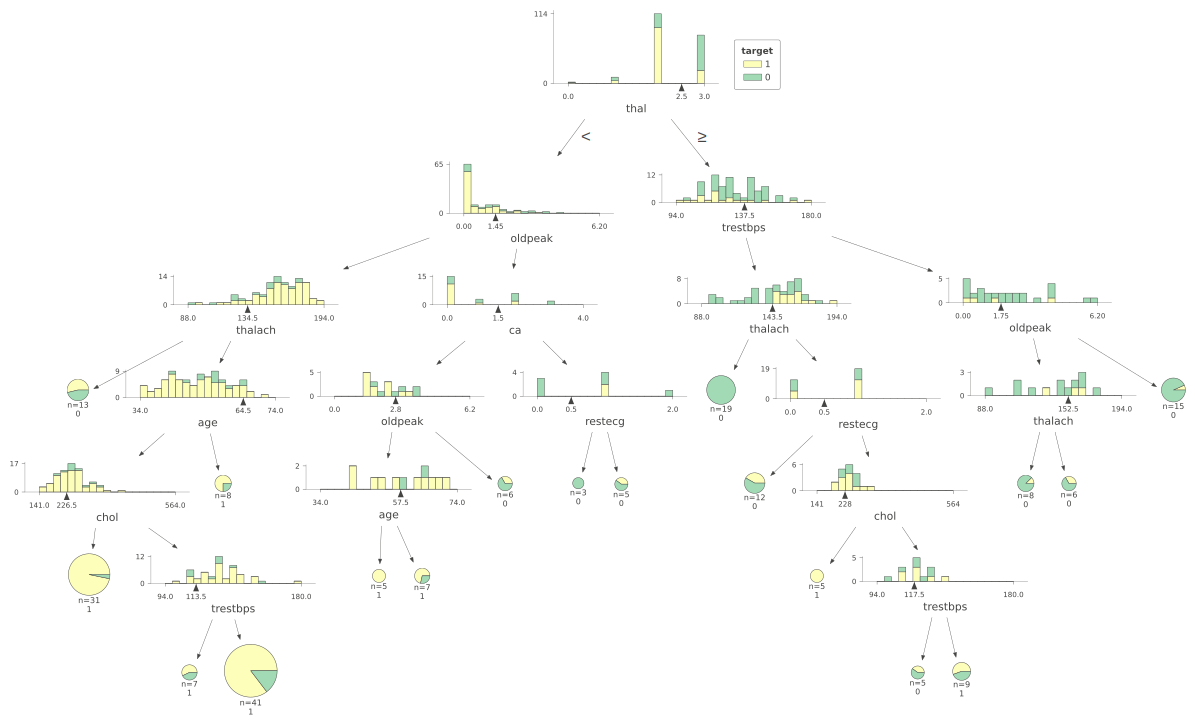

In [16]:
viz_cmodel.view(scale=1.2)

In [17]:
print(features)

['age', 'ca', 'chol', 'cp', 'exang', 'fbs', 'oldpeak', 'restecg', 'sex', 'slope', 'thal', 'thalach', 'trestbps']


In [18]:
model_1.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [19]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


df[~'infectionProb']

In [21]:
test = tfdf.keras.pd_dataframe_to_tf_dataset(df.loc[:, df.columns!='target'].head(1))
t1 = df['target'].head(1)

In [22]:
tes = model_1.predict(test, verbose=0)

2023-04-26 08:25:21.836019: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int64 and shape [1]
	 [[{{node Placeholder/_8}}]]


In [23]:
k = []
i = 0
cnt = 0
for t in tes:
    if(t[0]>0.50):
        k.append(1)
        #print("1 - " + str(t1[i]))
        if(t1[i] == 1):
            cnt += 1
    else:
        k.append(0)
        #print("0 - " + str(t1[i]))
        if(t1[i] == 0):
            cnt += 1
    i+=1
print(cnt/len(t1))

1.0


In [24]:
print(df.head(1))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   

   ca  thal  target  
0   2     3       0  


In [28]:
t2_dic = {'age':[103], 'cp': [0], 'fbs':[1], 'thalach ':[170]}
t2_df = pd.DataFrame.from_dict(t2_dic)

In [29]:
d2_tfdf = tfdf.keras.pd_dataframe_to_tf_dataset(t2_df)

In [30]:
model_1.predict(d2_tfdf, verbose=0)

2023-04-26 08:26:03.860535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]


ValueError: in user code:

    File "/home/renato/anaconda3/lib/python3.9/site-packages/tensorflow_decision_forests/keras/core_inference.py", line 458, in run_step  *
        outputs = model.predict_step(data)
    File "/home/renato/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 2111, in predict_step  **
        return self(x, training=False)
    File "/home/renato/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_filexwwlsd2w.py", line 104, in tf__call
        ag__.if_stmt(ag__.ld(self)._semantics is None, if_body_2, else_body_2, get_state_3, set_state_3, ('do_return', 'retval_'), 2)
    File "/tmp/__autograph_generated_filexwwlsd2w.py", line 43, in else_body_2
        normalized_inputs = ag__.converted_call(ag__.ld(self)._build_normalized_inputs, (ag__.ld(inputs),), None, fscope)
    File "/tmp/__autograph_generated_filel5i3o27u.py", line 98, in tf___build_normalized_inputs
        semantic_inputs = ag__.converted_call(ag__.ld(tf_core).combine_tensors_and_semantics, (ag__.ld(inputs), ag__.ld(self)._semantics), None, fscope)
    File "/tmp/__autograph_generated_filek1wz0kwj.py", line 34, in tf__combine_tensors_and_semantics
        ag__.if_stmt(ag__.not_(ag__.converted_call(ag__.converted_call(ag__.ld(set), (ag__.converted_call(ag__.ld(semantics).keys, (), None, fscope),), None, fscope).issubset, (ag__.converted_call(ag__.ld(inputs).keys, (), None, fscope),), None, fscope)), if_body, else_body, get_state, set_state, (), 0)
    File "/tmp/__autograph_generated_filek1wz0kwj.py", line 30, in if_body
        raise ag__.converted_call(ag__.ld(ValueError), (ag__.converted_call('semantics is not a subset of inputs (inputs={} vs semantics={}).'.format, (ag__.converted_call(ag__.ld(inputs).keys, (), None, fscope), ag__.converted_call(ag__.ld(semantics).keys, (), None, fscope)), None, fscope),), None, fscope)

    ValueError: Exception encountered when calling layer 'random_forest_model' (type RandomForestModel).
    
    in user code:
    
        File "/home/renato/anaconda3/lib/python3.9/site-packages/tensorflow_decision_forests/keras/core_inference.py", line 644, in call  *
            normalized_inputs = self._build_normalized_inputs(inputs)
        File "/home/renato/anaconda3/lib/python3.9/site-packages/tensorflow_decision_forests/keras/core_inference.py", line 603, in _build_normalized_inputs  *
            semantic_inputs = tf_core.combine_tensors_and_semantics(
        File "/home/renato/anaconda3/lib/python3.9/site-packages/tensorflow_decision_forests/tensorflow/core_inference.py", line 431, in combine_tensors_and_semantics  *
            raise ValueError("semantics is not a subset of inputs "
    
        ValueError: semantics is not a subset of inputs (inputs=dict_keys(['age', 'cp', 'fbs', 'thalach_']) vs semantics=dict_keys(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])).
    
    
    Call arguments received by layer 'random_forest_model' (type RandomForestModel):
      • inputs={'age': 'tf.Tensor(shape=(None,), dtype=int64)', 'cp': 'tf.Tensor(shape=(None,), dtype=int64)', 'fbs': 'tf.Tensor(shape=(None,), dtype=int64)', 'thalach_': 'tf.Tensor(shape=(None,), dtype=int64)'}
      • training=False
